# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
from sklearn.model_selection import train_test_split

In [48]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [49]:
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [51]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [52]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [53]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [54]:
df.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


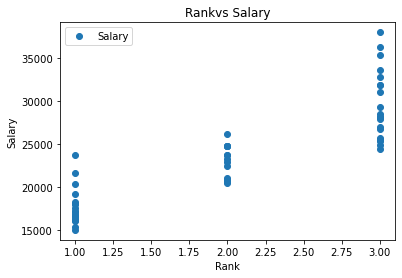

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [55]:
df.plot(x='Rank', y='Salary', style='o')
plt.title('Rankvs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()
#dataset[['Average_income','Petrol_Consumption']].corr()
df[['Rank','Salary']].corr()

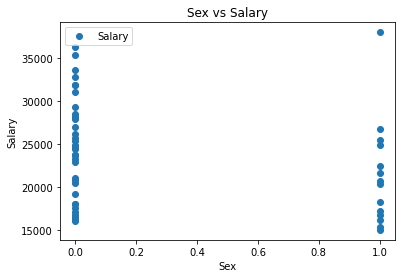

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [56]:
df.plot(x='Sex', y='Salary', style='o')
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()
df[['Sex','Salary']].corr()

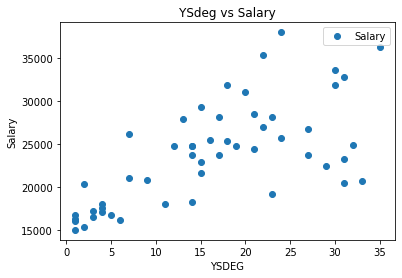

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [57]:
df.plot(x='YSdeg', y='Salary', style='o')
plt.title('YSdeg vs Salary')
plt.xlabel('YSDEG')
plt.ylabel('Salary')
plt.show()
#dataset[['Average_income','Petrol_Consumption']].corr()
df[['YSdeg','Salary']].corr()

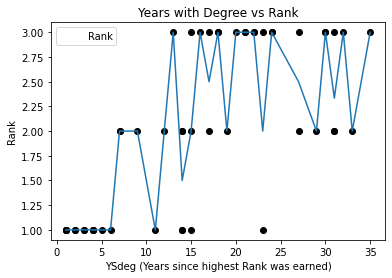

,YSdeg,Rank
YSdeg,1.000000,0.695724
Rank,0.695724,1.000000


In [58]:
df.plot(x='YSdeg', y='Rank', style='ok')
df.groupby('YSdeg')['Rank'].mean().plot()

plt.title('Years with Degree vs Rank')
plt.xlabel('YSdeg (Years since highest Rank was earned)')
plt.ylabel('Rank')
plt.show()

df[['YSdeg','Rank']].corr()

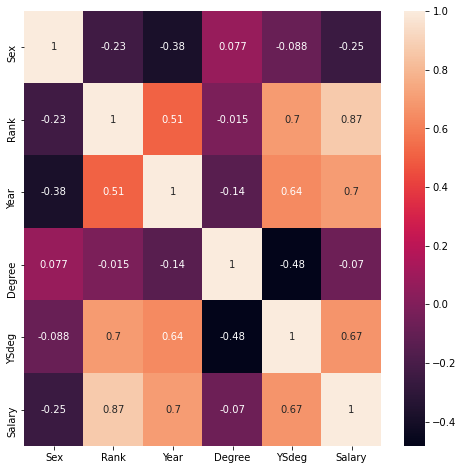

In [59]:
## Generating the Heat Map so that we can get more about the variables
correlation_of_variables = df.corr()
top_features = correlation_of_variables.index
plt.figure(figsize=(8,8))
#plot heat map
g=sns.heatmap(df[top_features].corr(),annot=True)
sns.color_palette("coolwarm", as_cmap=True)

### 1. Find the linear regression equation for this data using columns 1-5 to column 6.

In [61]:
X = df[["Sex", "Rank", "Year","Degree","YSdeg"]].values 
y = df.iloc[:, -1].values

In [63]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 5)  

In [66]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [67]:
y_pred = regressor.predict(X_test)

In [69]:
from sklearn import metrics
print('R2- SCORE using all the columns:', metrics.r2_score(y_test,y_pred))

R2- SCORE using all the columns: 0.7643758733362567


In [68]:
m1 = regressor.coef_[0] # x1 = sex
m2 = regressor.coef_[1] # x2 = Rank
m3 = regressor.coef_[2] # x3 = Year
m4 = regressor.coef_[3] # x4 = Degree
m5 = regressor.coef_[4] # x5 = YSdeg
c = regressor.intercept_

## as five variables are included so we have five coefficients that are being used

## so the equation for this linear regression is 

## y = m1*x1 + m2*x2 + m3*x3 + m4*x4 + m5*x5

print("Predicted Salary (Y) = {} * Sex(x1) + {} * Rank(x2) + {} * Year(x3) + {} * Degree(x4) + {} *  YSdeg(x5) + {}".
      format(regressor.coef_[0],regressor.coef_[1],regressor.coef_[2],regressor.coef_[3],regressor.coef_[4],regressor.intercept_))

Predicted Salary (Y) = 1452.6798420770688 * Sex(x1) + 5275.651443337122 * Rank(x2) + 339.98211752435674 * Year(x3) + -1011.8867387614907 * Degree(x4) + 25.653297273637506 *  YSdeg(x5) + 10752.154606157223


### 2.Find the selection of columns with the best  𝑅2  score.

In [70]:
X = df[["Sex", "Rank", "Year","Degree"]].values 
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 5)  

regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
from sklearn import metrics
print('R2- SCORE using all the columns except YSdeg:', metrics.r2_score(y_test,y_pred))

R2- SCORE using all the columns except YSdeg: 0.7817950467919601


In [71]:
X = df[["Sex", "Rank", "Year","YSdeg"]].values 
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 5)  

regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
from sklearn import metrics
print('R2- SCORE using all the columns except Degree:', metrics.r2_score(y_test,y_pred))

R2- SCORE using all the columns except Degree: 0.7410797701276542


In [72]:
X = df[["Sex", "Rank", "Degree","YSdeg"]].values 
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 5)  

regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
from sklearn import metrics
print('R2- SCORE using all the columns except Year:', metrics.r2_score(y_test,y_pred))

R2- SCORE using all the columns except Year: 0.442042784100132


In [73]:
X = df[["Sex", "Year", "Degree","YSdeg"]].values 
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 5)  

regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
from sklearn import metrics
print('R2- SCORE using all the columns except Rank:', metrics.r2_score(y_test,y_pred))

R2- SCORE using all the columns except Rank: 0.05336679552985557


In [74]:
X = df[["Degree", "Rank", "Year","YSdeg"]].values 
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 5)  

regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
from sklearn import metrics
print('R2- SCORE using all the columns except Sex:', metrics.r2_score(y_test,y_pred))

R2- SCORE using all the columns except Sex: 0.773541593854219


## as removing the sex column has highest score lets remove it permanently

In [76]:
X =  df[["Rank", "Year","Degree"]].values 
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 5)  

regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
from sklearn import metrics
print('R2- SCORE using all the columns except Sex and YSdeg:', metrics.r2_score(y_test,y_pred))

R2- SCORE using all the columns except Sex and YSdeg: 0.81859602849634


In [77]:
X = df[["Rank", "Year","YSdeg"]].values 
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 5)  

regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
from sklearn import metrics
print('R2- SCORE using all the columns except Sex and Degree:', metrics.r2_score(y_test,y_pred))

R2- SCORE using all the columns except Sex and Degree: 0.761739245131441


In [78]:
X = df[["Rank", "Degree","YSdeg"]].values 
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 5)  

regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
from sklearn import metrics
print('R2- SCORE using all the columns except Sex and Year:', metrics.r2_score(y_test,y_pred))

R2- SCORE using all the columns except Sex and Year: 0.49503641659642994


In [80]:
X = df[["Year", "Degree","YSdeg"]].values 
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 5)  

regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
from sklearn import metrics
print('R2- SCORE using all the columns except Sex and Rank:', metrics.r2_score(y_test,y_pred))

R2- SCORE using all the columns except Sex and Rank: 0.022636421700369502


## Removing Ysdeg has given good score removing permanently

In [81]:
X =  df[["Rank", "Year"]].values 
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 5)  

regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
from sklearn import metrics
print('R2- SCORE using all the columns except Sex,YSdeg,Degree:', metrics.r2_score(y_test,y_pred))

R2- SCORE using all the columns except Sex,YSdeg,Degree: 0.8480960739856329


In [82]:
X =  df[["Rank", "Degree"]].values 
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 5)  

regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
from sklearn import metrics
print('R2- SCORE using all the columns except Sex,YSdeg,Year:', metrics.r2_score(y_test,y_pred))

R2- SCORE using all the columns except Sex,YSdeg,Year: 0.5908022693461689


In [83]:
X =  df[["Year", "Degree"]].values 
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 5)  

regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
from sklearn import metrics
print('R2- SCORE using all the columns except Sex,YSdeg,Rank:', metrics.r2_score(y_test,y_pred))

R2- SCORE using all the columns except Sex,YSdeg,Rank: 0.4560270141863355


In [84]:
## Removibg Degree is very good factor and the score is also high

In [ ]:
X =  df[["Rank", "Year"]].values 
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 5)  

regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
from sklearn import metrics
print('R2- SCORE using all the columns except Sex,YSdeg,Degree:', metrics.r2_score(y_test,y_pred))

### 3. Report whether sex is a factor in salary.

In [85]:
df.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


## We can observe from the table that the coorelation fator with salary is very low with Sex and same repeats with the salary vs sex so i think Sex is a very weak factor in determining the salary

In [87]:
X = df[['Sex']].values
Y = df[['Salary']].values
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 5)  

regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
from sklearn import metrics
print('R2- SCORE using all the columns except Sex,YSdeg,Degree:', metrics.r2_score(y_test,y_pred))

R2- SCORE using all the columns except Sex,YSdeg,Degree: 0.0827951194358102


# The same the R score is alo very low so sex is very weak factor in determining the salary